In [28]:
#imports

# Scikit-learn module for PCA
from sklearn import decomposition

# Scikit-learn preprocessing module
from sklearn.preprocessing import normalize

#GNG 
import mdp


# Custom csv processor for importing data from csv
import utility.csv_process as reader

# Numpy for matrix manipulation
import numpy as np

# For 2d graphing
from matplotlib import pyplot as plt

# For building paths
from os import path


In [29]:
rw_1 = np.array(reader.cont_read(path.join('data', 'log_gait_1_RW.csv')), dtype = 'float64')
vr_1 = np.array(reader.cont_read(path.join('data', 'log_gait_1_VR.csv')), dtype = 'float64')

In [38]:
stacked_data = np.vstack((rw_1, vr_1))
data = np.around(normalize(stacked_data, axis = 0, norm = 'max'), decimals = 15)

#Perform the PCA
pca = decomposition.PCA(n_components=2)
stacked_2_components = pca.fit_transform(data)

#Unstack the datasets
rw_1_stacked_2 = stacked_2_components[0:len(rw_1)]
vr_1_stacked_2 = stacked_2_components[0+len(rw_1):len(rw_1)+len(vr_1)]

#Split the data into x and y values
rw_1_stacked_2_x = rw_1_stacked_2[:, 0]
rw_1_stacked_2_y = rw_1_stacked_2[:, 1]

vr_1_stacked_2_x = vr_1_stacked_2[:, 0]
vr_1_stacked_2_y = vr_1_stacked_2[:, 1]

In [39]:
gng = mdp.nodes.GrowingNeuralGasNode(max_nodes = 1000)

In [40]:
step_size = 20
for i in range(0,len(transform),step_size):
    gng.train(transform[i:i+step_size])
gng.stop_training()


In [41]:
gng.get_nodes_position().shape

(66, 2)

In [42]:
gng_array = np.array(gng.get_nodes_position())


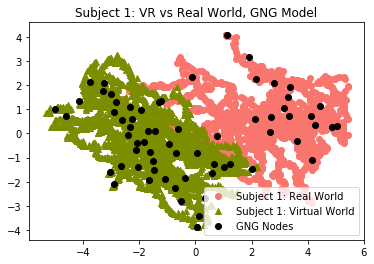

2 groups of connected nodes


In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(rw_1_stacked_2_x, rw_1_stacked_2_y, c='#F8766D', marker = "o", label = 'Subject 1: Real World')
ax1.scatter(vr_1_stacked_2_x, vr_1_stacked_2_y, c='#7C8E00', marker = "^", label = 'Subject 1: Virtual World')
ax1.scatter(gng_array[:,0], gng_array[:,1], c='k', label = 'GNG Nodes')

plt.title("Subject 1: VR vs Real World, GNG Model")
plt.legend(loc = 'best'); 
plt.show()
print(len(gng.graph.connected_components()),"groups of connected nodes")
